<a href="https://colab.research.google.com/github/ZiauddinMohammed/Text-Classification-Latent-Semantic-Analysis-on-Movie-Reviews/blob/master/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Detection

In [0]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

data=pd.read_csv("E:/NLP/spambase/spambase.data").as_matrix()
np.random.shuffle(data)

X=data[:,:48]
Y=data[:,-1]

Xtrain=X[:-100,]
Ytrain=Y[:-100,]

Xtest=X[-100:,]
Ytest=Y[-100:,]

model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("Classification rate for NB is :: ",model.score(Xtest,Ytest))
#print("Prediction rate for NB is :: ",model.predict("good"))
#model=AdaBoostClassifier()
#model.fit(Xtrain,Ytrain)
#print("Classification rate for AdaBoost is :: ",model.score(Xtest,Ytest))


Classification rate for NB is ::  0.86


# Text Classification

In [0]:
import os
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

word_lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

positive_reviews=[]
negative_reviews=[] 

def read_Posfiles(list_of_files):
    for file in list_of_files:
        try:
            positive_reviews.append(open("E:/NLP/aclImdb/train/pos/"+file).read())
        except:
            pass
def read_Negfiles(list_of_files):
    for file in list_of_files:
        try:
            negative_reviews.append(open("E:/NLP/aclImdb/train/neg/"+file).read())
        except:
            pass
                  
files=os.listdir("E:/NLP/aclImdb/train/pos") 
read_Posfiles(files[:1400])
files=os.listdir("E:/NLP/aclImdb/train/neg") 
read_Negfiles(files[:1400])

    
#np.random.shuffle(positive_reviews)
#np.random.shuffle(negative_reviews)

def my_tokenizer(s):
    s=s.lower()
    tokens=word_tokenize(s)
    tokens=[t for t in tokens if len(t)>2]
    tokens=[word_lemmatizer.lemmatize(t) for t in tokens]
    tokens=[t for t in tokens if t not in stop_words]
    return tokens

word_index_map={}
current_index=0
positive_tokens=[]
negative_tokens=[]

for review in positive_reviews:
    tokens=my_tokenizer(review)
    positive_tokens.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token]=current_index
            current_index+=1
            
for review in negative_reviews:
    tokens=my_tokenizer(review)
    negative_tokens.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token]=current_index
            current_index+=1

def tokens_to_vector(tokens,label):
    x=np.zeros(len(word_index_map)+1)
    for token in tokens:
        i=word_index_map[token]
        x[i]+=1
    x=x/x.sum()
    x[-1]=label
    return x

N=len(positive_tokens)+len(negative_tokens)
data=np.zeros((N,len(word_index_map)+1))

i=0
for token in positive_tokens:
    xy=tokens_to_vector(token,1)
    data[i,]=xy
    i+=1
for token in negative_tokens:
    xy=tokens_to_vector(token,0)
    data[i,]=xy
    i+=1
    
#np.random.shuffle(data)    
X=data[:,:-1]
Y=data[:,-1]

Xtrain=X[:-100,]
Ytrain=Y[:-100,]
Xtest=X[-100:,]
Ytest=Y[-100:,]

model=LogisticRegression()
model.fit(Xtrain,Ytrain)
print("Classification Rate of logistic regression is :: ",model.score(Xtest,Ytest))

'''threshold=0.5
for word,index in word_index_map.items():
    weight=model.coef_[0][index]
    if weight>threshold or weight<-threshold:
        print(word,weight)'''

Classification Rate of logistic regression is ::  0.5


'threshold=0.5\nfor word,index in word_index_map.items():\n    weight=model.coef_[0][index]\n    if weight>threshold or weight<-threshold:\n        print(word,weight)'

In [0]:
def tokens_to_vector(tokens):
    x=np.zeros(len(word_index_map))
    for token in tokens:
        if token not in 
        i=word_index_map[token]
        x[i]+=1
    x=x/x.sum()
    return x


yy=tokens_to_vector(token_test)
data_test[0,]=yy


In [0]:
#print(model.predict())
#print(positive_tokens[0]) 
#Xtrain[0:1,:]
s="Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting. The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie."
data_test=np.zeros((1,len(word_index_map)))

token_test=my_tokenizer(s)

print(token_test)


['robert', 'deniro', 'play', 'unbelievably', 'intelligent', 'illiterate', 'time', 'movie', 'wasteful', 'talent', 'truly', 'disgusting', 'script', 'unbelievable', 'dialog', 'unbelievable', 'jane', 'fonda', 'character', 'caricature', 'funny', 'one', 'movie', 'move', 'snail', 'pace', 'photographed', 'ill-advised', 'manner', 'insufferably', 'preachy', 'also', 'plug', 'every', 'cliche', 'book', 'swoozie', 'kurtz', 'excellent', 'supporting', 'role', 'equally', 'annoying', 'new', 'imdb', 'rule', 'requiring', 'ten', 'line', 'every', 'review', 'movie', 'worthless', 'doe', "n't", 'require', 'ten', 'line', 'text', 'let', 'reader', 'know', 'waste', 'time', 'tape', 'avoid', 'movie']


# Latent Semantic Analysis

Number of errors parsing file: 0 number of lines in file: 2373


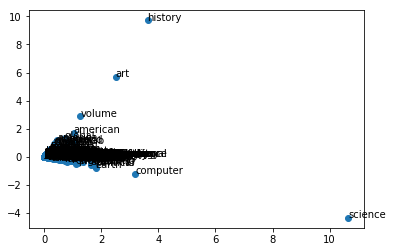

In [0]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('E:/NLP/all_book_titles.txt')]

# copy tokenizer from sentiment example
stopwords = set(stopwords.words('english'))

# note: an alternative source of stopwords
# from nltk.corpus import stopwords
# stopwords.words('english')

# add more stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens


# create a word-to-index map so that we can create our word-frequency vectors later
# let's also save the tokenized versions so we don't have to tokenize again later
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1


print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()


# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1


svd = TruncatedSVD()
Z = svd.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()
